<a href="https://colab.research.google.com/github/saisuresh1999/ML-DL-Technical-Interview-CICIDS17-/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split

In [3]:
datapath = "/content/drive/MyDrive/Dataset_clean.csv"
df=pd.read_csv(datapath,header=0,low_memory=False)

In [4]:
# Create attack column, containing binary labels

df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

Text(0.5, 1.0, 'Distribution of Attack Categories (Binary) 1 means attacked and 0 means normal')

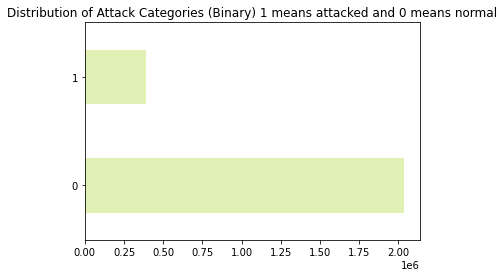

In [5]:
train_attacks = df['Attack'].value_counts()
train_attacks.plot(kind='barh', color='#dead')
plt.title('Distribution of Attack Categories (Binary) 1 means attacked and 0 means normal')

Text(0.5, 1.0, 'Distribution of Attack Categories')

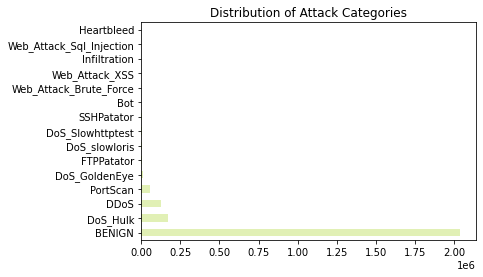

In [6]:
train_attacks = df['Label'].value_counts()
train_attacks.plot(kind='barh', color='#dead')
plt.title('Distribution of Attack Categories')

### **Train Test Split** 

In [7]:
# 2 Different labeling options
attacks = ['Label', 'Attack']

In [8]:
# xs=feature vectors, ys=labels
xs = df.drop(attacks, axis=1)
ys = df[attacks]

# split dataset - stratified
x_train, x_temp, y_train, y_temp = train_test_split(xs, ys, test_size=0.4, random_state=0, stratify=ys['Label'])
x_test, x_validate, y_test, y_validate = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp['Label'])

### ****Normalisation****

In [9]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_validate = min_max_scaler.transform(x_validate)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
pd.Series(x_train.flatten()).describe()

count    1.135240e+08
mean     9.293711e-02
std      2.607156e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.416666e-07
75%      7.025204e-03
max      1.000000e+00
dtype: float64

### **Feature Selection**

In [10]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train.Label)

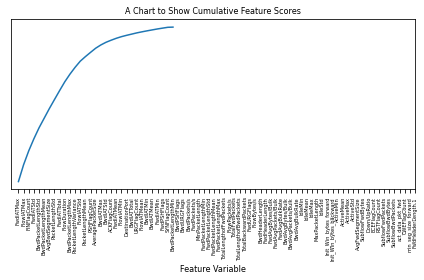

In [11]:
# sort the features by importance score
feature_importances = zip(df.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features.png', dpi=1080)

In [12]:
# perform selectkbest with k=40 becoz we select 40 features, 99% of the information is contained in the first 40, so this is the cut off point


features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.Label)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)
x_validate = fit.transform(x_validate)

In [13]:
attack = np.array(["BENIGN",	"Bot",	"DDoS",	"DoS_GoldenEye",	"DoS_Hulk",	"DoS_Slowhttptest",	"DoS_slowloris"	,"FTPPatator",	"Heartbleed","Infiltration"	,"PortScan","SSHPatator","Web_Attack_Brute_Force",	"Web_Attack_Sql_Injection","Web_Attack_XSS"])

### **Naive Bayes**

In [14]:
classifier = MultinomialNB()


### **All labels**

In [15]:
# fit model
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_nb_1

5.903223752975464 0.18544745445251465


col_0,BENIGN,DDoS,DoS_GoldenEye,DoS_Hulk,DoS_Slowhttptest,DoS_slowloris
Label,,,,,,
BENIGN,401084,98,14,1308,47,4550
Bot,386,3,0,0,0,0
DDoS,9384,13133,0,3084,0,0
DoS_GoldenEye,1273,577,127,0,0,79
DoS_Hulk,3501,2497,0,28304,0,0
DoS_Slowhttptest,862,0,0,0,174,0
DoS_slowloris,813,0,0,0,31,214
FTPPatator,1096,0,0,0,0,0
Heartbleed,0,0,0,2,0,0


In [16]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,attack,precision,recall,fscore
0,BENIGN,0.930879,0.985220,0.957279
1,Bot,0.000000,0.000000,0.000000
2,DDoS,0.804521,0.512988,0.626500
3,DoS_GoldenEye,0.900709,0.061770,0.115612
4,DoS_Hulk,0.865619,0.825141,0.844896
5,DoS_Slowhttptest,0.690476,0.167954,0.270186
6,DoS_slowloris,0.043988,0.202268,0.072261
7,FTPPatator,0.000000,0.000000,0.000000
8,Heartbleed,0.000000,0.000000,0.000000
9,Infiltration,0.000000,0.000000,0.000000


In [17]:
precision_nb_1, recall_nb_1, fscore_nb_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_nb_1 = accuracy_score(y_validate.Label, y_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Binary Labels**

In [18]:
# fit model
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_2 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_nb_2

0.4226679801940918 0.09068918228149414


col_0,0,1
Attack,,
0,399734,7367
1,32596,45449


In [19]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.924604,0.981904,0.952393
1,1,0.860516,0.582344,0.694615


In [20]:
precision_nb_2, recall_nb_2, fscore_nb_2, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_nb_2 = accuracy_score(y_validate.Attack, y_predicted)

### **Naive Bayes Eval Metrics Results**

In [21]:
print('Naive Bayes: Precision / Recall / Fscore / Accuracy')
print('All labels:', precision_nb_1, recall_nb_1, fscore_nb_1, accuracy_nb_1)
print('Binary labels:', precision_nb_2, recall_nb_2, fscore_nb_2, accuracy_nb_2)

Naive Bayes: Precision / Recall / Fscore / Accuracy
All labels: 0.28241276414988975 0.1836894384045239 0.19244887893710957 0.9132013867990254
Binary labels: 0.8925598216743772 0.7821236366891033 0.8235038242396606 0.9176268587188187
